## Option Value

An equity call (put) option represents the right to buy (sell) a unit of the underlying stock at a specified strike price at a predetermined data.

European options allow the option to be exercised only at maturity.
American options allow the option to be exercised at or before maturity.

Options are mostly settled in cash. Option sellers are called writers and option buyers are called option holders. The payoff of a call option can be defined as

$$\ h_t(S,K) = max[S_T - K, 0]$$

where $T$ is the maturity date of the option, $S_T$ is the underlying stock value at date $T$, and $K$ represents the strike price. We can plot the inner value function as

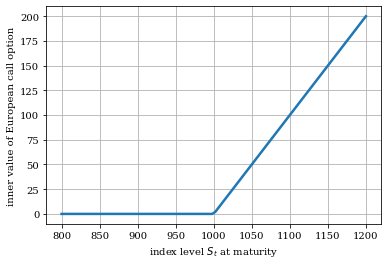

In [12]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams["font.family"] = "serif"

#Option Strike
K = 1000

#Graphical output
S = np.linspace(800, 1200, 100) #index level values
h = np.maximum(S - K, 0) #Intrinsic value of call option

plt.figure()
plt.plot(S, h, lw=2.5) #Plot intrinsic values at maturity
plt.xlabel("index level $S_t$ at maturity")
plt.ylabel('inner value of European call option')
plt.grid(True)

Three scenarios have to be distinguished with regard to the "moneyness" of an option:
- ITM: A call (put) option is ITM if S > K (S < K)
- ATM: A call (put) option is ATM if S ~ K
- OTM: A call (put) option is OTM if S < K (S > K)

That describes the payoff at maturity. But due to the TVM we must account for this uncertainty and TVM. Some additional factors which affect the present value of a call option today includes;
- Intial stock price: higher = more valuable
- Volatility: higher = more valuable
- TTM: greater = more valuable, over time options experience theta (decay due to the passage of time)
- Interest: higher = greater discount rate to derive present value

These heuristic insights were formalised in the seminal work of Black-Scholes-Merton (1973) who derived a closed form option pricing formula for a parsimonious set of input parameters. There main formula for the fair present value of a European call option $C_0^*$ is given by the function/formula $C^{BSM}(.)$, their formula is as follows

$C_0^* = C^{BSM}(S_0, K, T, r, \sigma)$

where the inputs are:
- $S_0$ current index level
- $K$ strike price of option
- $T$ TTM
- $r$ constant risk-free interest rate
- $\sigma $ volatility of the underlying stock returns

The Black-Scholes-Merton formula can also be plotted. The present value of the option is always above the intrinsic value. The difference is usually referred to as the 'time value' of the option. Therefore,

- Present value = Intrinsic value + Time value.

In [16]:

def dN(x):
    ''' Probability density function of standard normal random variable x. '''
    return math.exp(-0.5 * x ** 2) / math.sqrt(2 * math.pi)


def N(d):
    ''' Cumulative density function of standard normal random variable x. '''
    return quad(lambda x: dN(x), -20, d, limit=50)[0]


def d1f(St, K, t, T, r, sigma):
    ''' Black-Scholes-Merton d1 function.
        Parameters see e.g. BSM_call_value function. '''
    d1 = (math.log(St / K) + (r + 0.5 * sigma ** 2)
          * (T - t)) / (sigma * math.sqrt(T - t))
    return d1


Text(0, 0.5, 'present value $C(t=0)$')

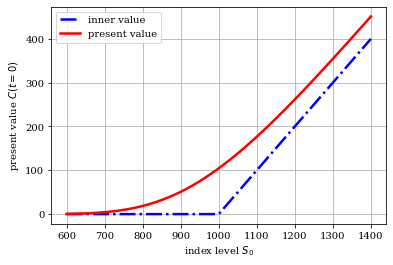

In [18]:
#Preparation
import math
from scipy.integrate import quad

#Function for BSM Call Value
def BSM_call_value(St, K, t, T, r, sigma):
    ''' Calculates Black-Scholes-Merton European call option value.
    '''
    d1 = d1f(St, K, t, T, r, sigma)
    d2 = d1 - sigma * math.sqrt(T - t)
    call_value = St * N(d1) - math.exp(-r * (T - t)) * K * N(d2)
    return call_value

#Load related tools
import sys
sys.path.append("05_com")

#Model parameters
K = 1000
T = 1.0 
r = 0.05
vol = 0.2 #constant volatility

#Sample data generation
S = np.linspace(600, 1400, 150) # vector of index level values
h = np.maximum(S - K, 0) # inner value of option
C = [BSM_call_value(S0, K, 0, T, r, vol) for S0 in S]

# calculate call option values
# Graphical Output
plt.figure()
plt.plot(S, h, 'b-.', lw=2.5, label='inner value')

# plot inner value at maturity
plt.plot(S, C, 'r', lw=2.5, label='present value')

# plot option present value
plt.grid(True)
plt.legend(loc=0)
plt.xlabel('index level $S_0$')
plt.ylabel('present value $C(t=0)$')

BSM Put values

In [21]:
def BSM_put_value(St, K, t, T, r, sigma):
    ''' Calculates Black-Scholes-Merton European put option value.
    '''
    put_value = BSM_call_value(St, K, t, T, r, sigma) \
        - St + math.exp(-r * (T - t)) * K
    return put_value


## Note on Exotic Options
The market value of a financial security is based on the assumtion that markets are efficient (EMH) and, thus, that prices are an accurate depiction of the fair value of a security. This is usually the case for regular derivatives such as options, futures, forwards, and swaps. However, for less liquid derivatives such as exotic derivatives, the sell-side and buy-side must have a mechanism to derive a fair price. This usually involves resorting to numerical methods such as Monte Carlo.

This brings up a key problem with the "market" value as we cannot assume it to be correct, unlike in the BSM pricing model.

## 3. Risks Affecting Equity Derivatives

To arrive at fair values for equity derivatives and hedging strategie, we must consider the market risk that influence the security prices. These include;
- Price risk
- Volatility risk: volatility isn't constant, it is stochastic
- Jump/Crash risk: Historical data suggsets that there is a significantly large probability for asymmetrically large market drops; and as such, discontinuities may break down otherwise sound dynamic hedging strategies.
- Interest rate risk: Doesn't directly affect but does affect value via risk-neutral discounting with the risk-free rate.
- Liquidity risk: Dynamic and static hedging strategies depends on market liquidity.
- Default risk: Risk that the company represented in the underlying asset defaults, resulting in the associated bonds/stocks depreciating to zero.

Addressing risks: Firstly, liquidity risk is mostly only important in the context of dynamic hedging strategies involving large trades or specifically with regards to a special market environment, e.g. Emerging markets. Furthermore, default risk can be pushed off if we hold a diversified portfolio or derivatives on an index.

This said, liquidity risk is becoming more of a concern to financial engineers - who don't currently have a sound composite model. Especially post COVID, where the liquidity pump and pull from the markets has made liquidity a larger concern in the ever-increasingly tightened monetary policy conditions - Quantitative tightening (QT) and hikes in interest rates from the central banks.

In addition to these market risks, there are other risks, such as specific model and operational risk. Model risk referes to the risk of adverse outcomes due to a failure of a specific model (e.g., 2008 when the Gaussian Copula was employed famously, "The Formula that Killed Wallstreet). Operational risk refers to all aspects of implementing valuation and risk management processes as well as risks related to IT systems used (accuracy and speed are necessary).

## Hedging
Hedging in this context refers to the activity of minimising or even eliminating risks resulting from option positions. Sell-side option writers - usually large financial institutes - usually employ sophisticated hedging tactics as their goal is to make a stable safe profit and lock in arbitrage profits rather than speculating on a certain direction. Writing an option makes cash via a premium that buyers pay in order to have the "option" to exercise the contract, but not the obligation.

Dynamic hedging requires frequent portfolio monitoring and rebalancing.

When setting up a hedge programme one must think about:
- Accounting level
- Accounting volatility
- Economic risks

The former two depends heavily on the country's accounting standards (e.g., US GAAP vs. IFRS). Here, we focus on cash flow driven risk such as economic risk. The most sophisticated way to approach this is that of arbitrage or **risk-neutral** pricing/hedging using models with *continuous price processes where prices processes may jump*, e.g., MJD model.

In essence, simply put, the goal of a hedging strategy is to replicate the inverse of the derivative's payoff and, thus, eliminate all risk. This however is very hard in practice primarily due to two main factors:
1. Frequency of hedge rebalancing - Can lead to high transaction prices.
2. Market incompleteness - it is impossible if jumps of the underlying process are possible. One must instead resort to a risk minimisation program where an expected hedge error is minimised. There is some inherent accepted risk.

If markets are complete, hedgers strive to completely eliminate cash flow risks resulting from options. If markets are incomplete, hedgers can only try to minimise the expected hedge errors.